## EDA

In [2]:
!pip install google-cloud-bigquery pandas-gbq


In [3]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.cloud import bigquery

In [39]:
path_to_credentials = '/home/jeniffersanches/lh_desafio_final/adventure_works_lighthouse/academy-dbt/adventure-works-lighthouse-0e2de9442ee9.json'
client = bigquery.Client.from_service_account_json(path_to_credentials)

In [40]:
project_id = 'adventure-works-lighthouse'
dataset_id = 'dbt_jeniffer'

In [41]:
# Função para carregar uma tabela específica
def carregar_tabela(nome_tabela):
    query = f"SELECT * FROM `{project_id}.{dataset_id}.{nome_tabela}`"
    return pd.read_gbq(query, project_id=project_id)

In [56]:
dData = carregar_tabela('dim_data')
dCliente = carregar_tabela('dim_cliente')
dProduto = carregar_tabela('dim_produto')
dRegiao = carregar_tabela('dim_regiao')
dVendedor = carregar_tabela('dim_vendedor')
fVendasItem = carregar_tabela('fct_vendas_item')
intTerritory = carregar_tabela('int_sales_territory')
intStore = carregar_tabela('int_sales_store')

/tmp/ipykernel_993/1443842569.py:4: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.read_gbq(query, project_id=project_id)
/tmp/ipykernel_993/1443842569.py:4: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.read_gbq(query, project_id=project_id)
/tmp/ipykernel_993/1443842569.py:4: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.read_gbq(query, project_id=project_id)
/tmp/ipykernel_993/1443842569.py:4: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://

In [9]:
dData.head()

,sk_data,date_day,prior_date_day,next_date_day,prior_year_date_day,prior_year_over_year_date_day,day_of_week,day_of_week_iso,day_of_week_name,day_of_week_name_short,...,quarter_start_date,quarter_end_date,year_number,year_start_date,year_end_date,fl_final_de_semana,nm_dia_semana,nm_dia_semana_abrv,nm_mes,nm_mes_abrv
0,8b40aaa860302d8df15678624c00bc78,2011-04-19,2011-04-18,2011-04-20,2010-04-19,2010-04-20,3,2,Tuesday,Tue,...,2011-04-01,2011-06-30,2011,2011-01-01,2011-12-31,False,Terça-Feira,Ter,Abril,Abr
1,744c0fc908ecce01856c94690d5fe894,2011-05-23,2011-05-22,2011-05-24,2010-05-23,2010-05-24,2,1,Monday,Mon,...,2011-04-01,2011-06-30,2011,2011-01-01,2011-12-31,False,Segunda,Seg,Maio,Mai
2,b555462f5090f8f6430b5555f72d3127,2011-05-26,2011-05-25,2011-05-27,2010-05-26,2010-05-27,5,4,Thursday,Thu,...,2011-04-01,2011-06-30,2011,2011-01-01,2011-12-31,False,Quinta-Feira,Qui,Maio,Mai
3,ab6d3acf2b0a62281b6571fc8d668638,2011-06-02,2011-06-01,2011-06-03,2010-06-02,2010-06-03,5,4,Thursday,Thu,...,2011-04-01,2011-06-30,2011,2011-01-01,2011-12-31,False,Quinta-Feira,Qui,Junho,Jun
4,678caa14c34b8cae6c6d891332fcde62,2011-06-03,2011-06-02,2011-06-04,2010-06-03,2010-06-04,6,5,Friday,Fri,...,2011-04-01,2011-06-30,2011,2011-01-01,2011-12-31,False,Sexta-Feira,Sex,Junho,Jun


In [10]:
dData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sk_data                         1460 non-null   object 
 1   date_day                        1460 non-null   dbdate 
 2   prior_date_day                  1460 non-null   dbdate 
 3   next_date_day                   1460 non-null   dbdate 
 4   prior_year_date_day             1460 non-null   dbdate 
 5   prior_year_over_year_date_day   1460 non-null   dbdate 
 6   day_of_week                     1460 non-null   Int64  
 7   day_of_week_iso                 1460 non-null   Int64  
 8   day_of_week_name                1460 non-null   object 
 9   day_of_week_name_short          1460 non-null   object 
 10  day_of_month                    1460 non-null   Int64  
 11  day_of_year                     1460 non-null   Int64  
 12  week_start_date                 14

In [57]:
dCliente.head()

,sk_cliente,id_cliente,id_entidade_negocio,id_loja,tipo_pessoa,nm_pessoa,nm_meio,nm_ultimo,nm_completo,emailpromotion,email
0,28d0fd38adf4402b0f42961bfcf83719,21605,<NA>,<NA>,None,None,None,None,None,<NA>,None
1,77d45fc478bbea9dbe0dd3557b4fcfb6,22160,<NA>,<NA>,None,None,None,None,None,<NA>,None
2,98b419de2d8f5295a37afac127ae97da,22970,<NA>,<NA>,None,None,None,None,None,<NA>,None
3,b80a36cffb5a1fca337cbe44acc891eb,23090,<NA>,<NA>,None,None,None,None,None,<NA>,None
4,1f68a484545e315b138ad7a4794e07e4,23156,<NA>,<NA>,None,None,None,None,None,<NA>,None


In [58]:
dCliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sk_cliente           19820 non-null  object
 1   id_cliente           19820 non-null  Int64 
 2   id_entidade_negocio  10274 non-null  Int64 
 3   id_loja              1336 non-null   Int64 
 4   tipo_pessoa          10274 non-null  object
 5   nm_pessoa            10274 non-null  object
 6   nm_meio              6250 non-null   object
 7   nm_ultimo            10274 non-null  object
 8   nm_completo          10274 non-null  object
 9   emailpromotion       10274 non-null  Int64 
 10  email                10274 non-null  object
dtypes: Int64(4), object(7)
memory usage: 1.7+ MB


In [111]:
cliente = dCliente[['sk_cliente', 'id_cliente', 'id_loja', 'id_entidade_negocio', 'tipo_pessoa']]
# Preencha os valores nulos na coluna 'id_loja' com 0 usando o método .loc
cliente.loc[:, 'id_loja'] = cliente['id_loja'].fillna(0)
cliente

,sk_cliente,id_cliente,id_loja,id_entidade_negocio,tipo_pessoa
0,28d0fd38adf4402b0f42961bfcf83719,21605,0,<NA>,None
1,77d45fc478bbea9dbe0dd3557b4fcfb6,22160,0,<NA>,None
2,98b419de2d8f5295a37afac127ae97da,22970,0,<NA>,None
3,b80a36cffb5a1fca337cbe44acc891eb,23090,0,<NA>,None
4,1f68a484545e315b138ad7a4794e07e4,23156,0,<NA>,None
...,...,...,...,...,...
19815,0a093b0aa3c9113a578d1cedcd600e91,282,1928,282,Vendedor
19816,0be91af42874c16150b36d9fbe3496d7,279,1930,279,Vendedor
19817,11e04cd101a54aab385246d0e6645828,85,1262,85,Funcionário (não vendas)
19818,14ae5b8540335d6b71a5f82ee9f11351,135,710,135,Funcionário (não vendas)


In [113]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sk_cliente           19820 non-null  object
 1   id_cliente           19820 non-null  Int64 
 2   id_loja              19820 non-null  Int64 
 3   id_entidade_negocio  10274 non-null  Int64 
 4   tipo_pessoa          10274 non-null  object
dtypes: Int64(3), object(2)
memory usage: 832.4+ KB


In [11]:
dProduto.head()

,sk_produto,id_produto,id_subcategoria_produto,nm_produto,cd_produto,cor_produto,estilo_produto,id_categoria_produto,nm_subcategoria_produto,nm_categoria_produto
0,931638fd7fcddc96f9cafeae22cfe6af,323,<NA>,Crown Race,CR-9981,None,None,<NA>,None,None
1,85843298a486e232a92807ca28589803,347,<NA>,Flat Washer 8,FW-5800,None,None,<NA>,None,None
2,06a017a5e14bec6c2586e36b976e2aab,513,<NA>,Touring Rim,RM-T801,None,None,<NA>,None,None
3,0c2ebfc1aa5a15d6ba0326dc8d39067b,341,<NA>,Flat Washer 1,FW-1000,None,None,<NA>,None,None
4,aeddfde84ceb96eaf2382e358fa77cb9,367,<NA>,Thin-Jam Hex Nut 3,HJ-5161,None,None,<NA>,None,None


In [12]:
dProduto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sk_produto               504 non-null    object
 1   id_produto               504 non-null    Int64 
 2   id_subcategoria_produto  295 non-null    Int64 
 3   nm_produto               504 non-null    object
 4   cd_produto               504 non-null    object
 5   cor_produto              256 non-null    object
 6   estilo_produto           211 non-null    object
 7   id_categoria_produto     295 non-null    Int64 
 8   nm_subcategoria_produto  295 non-null    object
 9   nm_categoria_produto     295 non-null    object
dtypes: Int64(3), object(7)
memory usage: 41.0+ KB


In [91]:
produto = dProduto[['sk_produto', 'nm_produto', 'id_produto']]
produto

,sk_produto,nm_produto,id_produto
0,931638fd7fcddc96f9cafeae22cfe6af,Crown Race,323
1,85843298a486e232a92807ca28589803,Flat Washer 8,347
2,06a017a5e14bec6c2586e36b976e2aab,Touring Rim,513
3,0c2ebfc1aa5a15d6ba0326dc8d39067b,Flat Washer 1,341
4,aeddfde84ceb96eaf2382e358fa77cb9,Thin-Jam Hex Nut 3,367
...,...,...,...
499,540c42e7b27085083308896323cb7e9e,HL Road Pedal,940
500,ebc5330aa02ed5bbd51153359dfd6a47,LL Mountain Pedal,935
501,2b8dd93aa178c1c5d601b1273645b2f2,LL Road Pedal,938
502,9c544214e38e6c79af5240f816669438,ML Road Pedal,939


In [14]:
dRegiao.head()

,sk_regiao,id_endereco,id_estado,endereco,cidade,id_territorio,cd_estado,cd_pais,nm_estado,nm_pais,nm_continente
0,a36a2f8580fd44ccf49677cd0ace05df,20116,1,6155 Vist Oak Dr,Calgary,6,AB,CA,Alberta,Canada,North America
1,1c341d900b4b7214ca51cbe28ad1cea2,553,1,"253131 Lake Frasier Drive, Office No. 2",Calgary,6,AB,CA,Alberta,Canada,North America
2,8d9aaddfea46051db56f8ce293daff6c,13975,1,6827 Glaze Dr.,Calgary,6,AB,CA,Alberta,Canada,North America
3,06521ccef2b4ad66666b27c4c232aa99,33,1,10203 Acorn Avenue,Calgary,6,AB,CA,Alberta,Canada,North America
4,24ab372757e1476a402d06588e087b89,505,1,"6400, 888 - 3rd Avenue",Calgary,6,AB,CA,Alberta,Canada,North America


In [15]:
dRegiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19614 entries, 0 to 19613
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sk_regiao      19614 non-null  object
 1   id_endereco    19614 non-null  Int64 
 2   id_estado      19614 non-null  Int64 
 3   endereco       19614 non-null  object
 4   cidade         19614 non-null  object
 5   id_territorio  19614 non-null  Int64 
 6   cd_estado      19614 non-null  object
 7   cd_pais        19614 non-null  object
 8   nm_estado      19614 non-null  object
 9   nm_pais        19614 non-null  object
 10  nm_continente  19614 non-null  object
dtypes: Int64(3), object(8)
memory usage: 1.7+ MB


In [16]:
regiao = dRegiao[['sk_regiao', 'endereco', 'cidade', 'nm_estado', 'nm_pais', 'nm_continente']].rename(columns={'nm_estado': 'estado', 'nm_pais': 'pais', 'nm_continente': 'continente'})
regiao

,sk_regiao,endereco,cidade,estado,pais,continente
0,a36a2f8580fd44ccf49677cd0ace05df,6155 Vist Oak Dr,Calgary,Alberta,Canada,North America
1,1c341d900b4b7214ca51cbe28ad1cea2,"253131 Lake Frasier Drive, Office No. 2",Calgary,Alberta,Canada,North America
2,8d9aaddfea46051db56f8ce293daff6c,6827 Glaze Dr.,Calgary,Alberta,Canada,North America
3,06521ccef2b4ad66666b27c4c232aa99,10203 Acorn Avenue,Calgary,Alberta,Canada,North America
4,24ab372757e1476a402d06588e087b89,"6400, 888 - 3rd Avenue",Calgary,Alberta,Canada,North America
...,...,...,...,...,...,...
19609,9689bac05318ba776009115a44673d3c,"8919, rue Basse-du-Rocher",Cergy,Val d'Oise,France,Europe
19610,845b6af14959ae9ab89749ac3812e2a2,"16, avenue de Malakoff",Cergy,Val d'Oise,France,Europe
19611,9634eb8becce771c776e8066955592be,"28, place de la Concorde",Cergy,Val d'Oise,France,Europe
19612,da367000182c96482367a80ce955bbf5,"16, rue de l´Avenir",Cergy,Val d'Oise,France,Europe


In [17]:
dVendedor.head()

,sk_vendedor,id_entidade_negocio,id_territorio,cargo,nm_completo
0,abe7304659305a3c216576018258bb8e,285,<NA>,Pacific Sales Manager,Syed E Abbas
1,ca1f74d06115a3da340f50ce6bd49d7d,287,<NA>,European Sales Manager,Amy E Alberts
2,e3fdfceed5590d2023fad348b0e071f7,274,<NA>,North American Sales Manager,Stephen Y Jiang
3,9676361fe4b2c64e47788ea00338a67b,280,1,Sales Representative,Pamela O Ansman-Wolfe
4,29261314c42e48a1cead7d57e039437c,283,1,Sales Representative,David R Campbell


In [18]:
dVendedor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sk_vendedor          17 non-null     object
 1   id_entidade_negocio  17 non-null     Int64 
 2   id_territorio        14 non-null     Int64 
 3   cargo                17 non-null     object
 4   nm_completo          17 non-null     object
dtypes: Int64(2), object(3)
memory usage: 846.0+ bytes


In [31]:
vendedor = dVendedor[['sk_vendedor', 'id_entidade_negocio', 'id_territorio', 'nm_completo', 'cargo']].rename(columns={'nm_completo': 'nome_vendedor'})
vendedor

,sk_vendedor,id_entidade_negocio,id_territorio,nome_vendedor,cargo
0,abe7304659305a3c216576018258bb8e,285,<NA>,Syed E Abbas,Pacific Sales Manager
1,ca1f74d06115a3da340f50ce6bd49d7d,287,<NA>,Amy E Alberts,European Sales Manager
2,e3fdfceed5590d2023fad348b0e071f7,274,<NA>,Stephen Y Jiang,North American Sales Manager
3,9676361fe4b2c64e47788ea00338a67b,280,1,Pamela O Ansman-Wolfe,Sales Representative
4,29261314c42e48a1cead7d57e039437c,283,1,David R Campbell,Sales Representative
5,37c4fba2171b4306cf7a1d896a92287f,284,1,Tete A Mensa-Annan,Sales Representative
6,1d70e9a75cb68c82da4805cbae41208e,275,2,Michael G Blythe,Sales Representative
7,338c115820cfdc91cc5015104b430c56,277,3,Jillian Carson,Sales Representative
8,d0a682504387a3b99111d3c2a10ffa8b,276,4,Linda C Mitchell,Sales Representative
9,23dac6b3800f561b5e9a7f1ffba79209,281,4,Shu K Ito,Sales Representative


In [20]:
intTerritory.head()

,sk_territorio,id_territorio,nm_pais,nm_continente,cd_pais,vr_venda_ytd,vr_venda_ano_passado,dt_modificacao
0,d03dbdea391d3a326d7e4c762e69a224,10,United Kingdom,Europe,GB,5.012905e+06,1.635823e+06,2008-04-30
1,2ac09cde8b44c00477d6200bee899994,7,France,Europe,FR,4.772398e+06,2.396540e+06,2008-04-30
2,0e1bd07a0f7c2930141dd91e650ae554,8,Germany,Europe,DE,3.805202e+06,1.307950e+06,2008-04-30
3,29de1144c9e32995961be2cad8febe86,9,Australia,Pacific,AU,5.977815e+06,2.278549e+06,2008-04-30
4,48e6bbd1e9db153c5e392694e03f1143,3,Central,North America,US,3.072175e+06,3.205014e+06,2008-04-30


In [21]:
intTerritory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sk_territorio         10 non-null     object 
 1   id_territorio         10 non-null     Int64  
 2   nm_pais               10 non-null     object 
 3   nm_continente         10 non-null     object 
 4   cd_pais               10 non-null     object 
 5   vr_venda_ytd          10 non-null     float64
 6   vr_venda_ano_passado  10 non-null     float64
 7   dt_modificacao        10 non-null     dbdate 
dtypes: Int64(1), dbdate(1), float64(2), object(4)
memory usage: 782.0+ bytes


In [32]:
territory = intTerritory[['sk_territorio', 'id_territorio', 'nm_pais', 'nm_continente', 'cd_pais']].rename(columns={'nm_pais': 'pais', 'nm_continente': 'continente'})
territory

,sk_territorio,id_territorio,pais,continente,cd_pais
0,d03dbdea391d3a326d7e4c762e69a224,10,United Kingdom,Europe,GB
1,2ac09cde8b44c00477d6200bee899994,7,France,Europe,FR
2,0e1bd07a0f7c2930141dd91e650ae554,8,Germany,Europe,DE
3,29de1144c9e32995961be2cad8febe86,9,Australia,Pacific,AU
4,48e6bbd1e9db153c5e392694e03f1143,3,Central,North America,US
5,86be6a06b130a13f7b3cc98fbb65ace4,5,Southeast,North America,US
6,c7db5c9491dc9e0d3f2af28c73d08730,1,Northwest,North America,US
7,2f8714df4c86ad614b30c093df16d765,2,Northeast,North America,US
8,bb07a16f51bdb10dec1f49513bc703a0,4,Southwest,North America,US
9,1c817486bb7081237a95e45d50bc4eb1,6,Canada,North America,CA


In [43]:
fVendasItem.head()

,cliente_fk,vendedor_fk,regiao_fk,cartao_credito_fk,data_fk,produto_fk,id_territorio,id_pedido,dt_pedido,dt_devida_entrega,...,status_pedido,canal_venda,vr_subtotal_pedido,vr_imposto_pedido,vr_frete_pedido,vr_total_devido,vr_produto,vr_desconto,qt_encomendada_produto,total_linha_produto
0,4df95b080c926a909dc02e3663d3e4e8,None,c961c7f96de3c17a9488bb10f60c97d4,14cc42c692f167463e6d5c3b03409391,0009a6b11b9a8daa9631623447b1d9a3,7f5134ac0abda97e55ea7ff1bb567ec9,8,45890,2012-03-12,2012-03-24,...,Enviado,Online,3374.99,270.00,84.37,3729.36,3374.99,0.0,1,3374.99
1,6437fceb9191d4fc16c2bcd26867b543,None,28760f64b4e4390210bc59206f2cae7e,2d99a88c0389503fe56b6623b40b5e10,0009a6b11b9a8daa9631623447b1d9a3,2d12bf2e42ff7714d5291bf02d76ab7e,8,45891,2012-03-12,2012-03-24,...,Enviado,Online,3399.99,272.00,85.00,3756.99,3399.99,0.0,1,3399.99
2,7dc82e30184e0b16d323da9f5e46a3d8,None,0c4904a4d4b60748a8ff6941e844360c,c6f868f27f015c0b3e577647b9044e5b,0009a6b11b9a8daa9631623447b1d9a3,21347d853a80b33f0e86454f609d9a0c,6,45893,2012-03-12,2012-03-24,...,Enviado,Online,3578.27,286.26,89.46,3953.99,3578.27,0.0,1,3578.27
3,94591e59d3371710bceeeeb1e7d72178,None,e51d3834591544b41246696f815cc815,4cd6bafad0909ddbcf61d0da374e7695,0009a6b11b9a8daa9631623447b1d9a3,f39f9743428a0b2dce2f2866e05425d4,9,45892,2012-03-12,2012-03-24,...,Enviado,Online,3578.27,286.26,89.46,3953.99,3578.27,0.0,1,3578.27
4,2314714799980c3c388482398873e6c4,None,b09f204419b136f6ba6dffe6844b8f53,bdd2ca25e9b5af2692980bf686681bb8,000cde5399537ce62492be8962668dd7,e2af3f558beefa9b141dc96423d46fe6,6,58083,2013-10-16,2013-10-28,...,Enviado,Online,120.00,9.60,3.00,132.60,120.00,0.0,1,120.00


In [44]:
fVendasItem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cliente_fk              121317 non-null  object 
 1   vendedor_fk             60919 non-null   object 
 2   regiao_fk               121317 non-null  object 
 3   cartao_credito_fk       118744 non-null  object 
 4   data_fk                 121317 non-null  object 
 5   produto_fk              121317 non-null  object 
 6   id_territorio           121317 non-null  Int64  
 7   id_pedido               121317 non-null  Int64  
 8   dt_pedido               121317 non-null  dbdate 
 9   dt_devida_entrega       121317 non-null  dbdate 
 10  dt_envio                121317 non-null  dbdate 
 11  dt_modificacao          121317 non-null  dbdate 
 12  nm_motivo_final         121317 non-null  object 
 13  status_pedido           121317 non-null  object 
 14  canal_venda         

In [50]:
colunas_para_remover = ['vendedor_fk', 'cartao_credito_fk', 'nm_motivo_final']
vendasItem = fVendasItem.drop(colunas_para_remover, axis=1)
vendasItem

,cliente_fk,regiao_fk,data_fk,produto_fk,id_territorio,id_pedido,dt_pedido,dt_devida_entrega,dt_envio,dt_modificacao,status_pedido,canal_venda,vr_subtotal_pedido,vr_imposto_pedido,vr_frete_pedido,vr_total_devido,vr_produto,vr_desconto,qt_encomendada_produto,total_linha_produto
0,4df95b080c926a909dc02e3663d3e4e8,c961c7f96de3c17a9488bb10f60c97d4,0009a6b11b9a8daa9631623447b1d9a3,7f5134ac0abda97e55ea7ff1bb567ec9,8,45890,2012-03-12,2012-03-24,2012-03-19,2012-03-19,Enviado,Online,3374.99,270.00,84.37,3729.36,3374.99,0.0,1,3374.99
1,6437fceb9191d4fc16c2bcd26867b543,28760f64b4e4390210bc59206f2cae7e,0009a6b11b9a8daa9631623447b1d9a3,2d12bf2e42ff7714d5291bf02d76ab7e,8,45891,2012-03-12,2012-03-24,2012-03-19,2012-03-19,Enviado,Online,3399.99,272.00,85.00,3756.99,3399.99,0.0,1,3399.99
2,7dc82e30184e0b16d323da9f5e46a3d8,0c4904a4d4b60748a8ff6941e844360c,0009a6b11b9a8daa9631623447b1d9a3,21347d853a80b33f0e86454f609d9a0c,6,45893,2012-03-12,2012-03-24,2012-03-19,2012-03-19,Enviado,Online,3578.27,286.26,89.46,3953.99,3578.27,0.0,1,3578.27
3,94591e59d3371710bceeeeb1e7d72178,e51d3834591544b41246696f815cc815,0009a6b11b9a8daa9631623447b1d9a3,f39f9743428a0b2dce2f2866e05425d4,9,45892,2012-03-12,2012-03-24,2012-03-19,2012-03-19,Enviado,Online,3578.27,286.26,89.46,3953.99,3578.27,0.0,1,3578.27
4,2314714799980c3c388482398873e6c4,b09f204419b136f6ba6dffe6844b8f53,000cde5399537ce62492be8962668dd7,e2af3f558beefa9b141dc96423d46fe6,6,58083,2013-10-16,2013-10-28,2013-10-23,2013-10-23,Enviado,Online,120.00,9.60,3.00,132.60,120.00,0.0,1,120.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121312,73a38f9b858153f4d87f4026cde557aa,1aae009e319e70c3a793415278e23b43,ffd79a6b2d95779303fd7bedd778bf93,3bbc790ca5bf11fdb3c60f33e8797cb7,4,51353,2013-06-09,2013-06-21,2013-06-16,2013-06-16,Enviado,Online,1257.82,100.63,31.45,1389.89,4.99,0.0,1,4.99
121313,73a38f9b858153f4d87f4026cde557aa,1aae009e319e70c3a793415278e23b43,ffd79a6b2d95779303fd7bedd778bf93,11e57a1a7fb7119f1e9941f7945cb843,4,51353,2013-06-09,2013-06-21,2013-06-16,2013-06-16,Enviado,Online,1257.82,100.63,31.45,1389.89,28.99,0.0,1,28.99
121314,c58dd48b7247bec898214f3a5f76863a,169116d7a6bf06caa52fc8be20894eb3,ffd79a6b2d95779303fd7bedd778bf93,1a1e17e17bf07c338d748aca95408c90,8,51357,2013-06-09,2013-06-21,2013-06-16,2013-06-16,Enviado,Online,615.47,49.24,15.39,680.09,539.99,0.0,1,539.99
121315,c58dd48b7247bec898214f3a5f76863a,169116d7a6bf06caa52fc8be20894eb3,ffd79a6b2d95779303fd7bedd778bf93,6d6cab96db5f8fc10b81e58b78e141d1,8,51357,2013-06-09,2013-06-21,2013-06-16,2013-06-16,Enviado,Online,615.47,49.24,15.39,680.09,53.99,0.0,1,53.99


In [102]:
intStore.head()

,sk_loja,id_entidade_negocio,nm_loja,id_vendedor,dt_modificacao
0,f7721ec8ebfc2e4d2a0e480e117ee782,1856,Grown-up Bike Store,275,2014-09-12
1,0bf35672669287199963ca03c5d0de00,1248,Glossy Bikes,275,2014-09-12
2,df0c8c4d13844b68bb26db39665b71eb,1912,The Cycle Store,275,2014-09-12
3,e5f18c3195d4457bdd18b4e327464a01,1176,Eleventh Bike Store,275,2014-09-12
4,c8eb28842490f49e214cae2b0baa5ad2,664,Casual Bicycle Store,275,2014-09-12


In [114]:
intStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sk_loja              701 non-null    object
 1   id_entidade_negocio  701 non-null    Int64 
 2   nm_loja              701 non-null    object
 3   id_vendedor          701 non-null    Int64 
 4   dt_modificacao       701 non-null    dbdate
dtypes: Int64(2), dbdate(1), object(2)
memory usage: 28.9+ KB


In [115]:
# Mantenha apenas as colunas desejadas em intStore e renomeie a coluna nm_loja para nome_loja
loja = intStore[['id_entidade_negocio', 'nm_loja']].rename(columns={'nm_loja': 'nome_loja'})
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_entidade_negocio  701 non-null    Int64 
 1   nome_loja            701 non-null    object
dtypes: Int64(1), object(1)
memory usage: 11.8+ KB


In [118]:
# Realize o merge entre cliente e loja usando as colunas id_loja e id_entidade_negocio (inner join)
df_loja = pd.merge(cliente, loja, left_on='id_loja', right_on='id_entidade_negocio', how='inner')

# Exiba o DataFrame resultante
df_loja

,sk_cliente,id_cliente,id_loja,id_entidade_negocio_x,tipo_pessoa,id_entidade_negocio_y,nome_loja
0,22e38dbe45edd413094e5cc991f3e475,29719,822,<NA>,None,822,Racing Bike Outlet
1,4d2a5baeb13e13644506a666267d8c7b,29675,728,<NA>,None,728,Wholesale Bikes
2,b34d927276c19170e10f182361cbcf54,400,1110,<NA>,None,1110,Local Sales and Rental
3,978575cf173eb29b2eb91b8ea9c756e3,622,1822,<NA>,None,1822,Gift and Toy Store
4,f4de0a7090eec221f12ef7ddfdf6c99a,29673,724,<NA>,None,724,Two Wheels Cycle Store
...,...,...,...,...,...,...,...
1331,0a093b0aa3c9113a578d1cedcd600e91,282,1928,282,Vendedor,1928,Quick Parts and Service
1332,0be91af42874c16150b36d9fbe3496d7,279,1930,279,Vendedor,1930,Reliable Brake Systems
1333,11e04cd101a54aab385246d0e6645828,85,1262,85,Funcionário (não vendas),1262,Roadway Bicycle Supply
1334,14ae5b8540335d6b71a5f82ee9f11351,135,710,135,Funcionário (não vendas),710,Wonderful Bikes Inc.


In [119]:
quantidade_lojas = df_loja['nome_loja'].nunique()
print(f"A quantidade de lojas distintas é: {quantidade_lojas}")


A quantidade de lojas distintas é: 699


In [129]:
# Realize o merge entre vendasItem e df_loja usando as colunas cliente_fk e sk_cliente (left join)
vendas_final = pd.merge(vendasItem, df_loja, left_on='cliente_fk', right_on='sk_cliente', how='left')

# Realize o merge entre vendas_final e produto usando as colunas produto_fk e sk_produto (left join)
vendas_final = pd.merge(vendas_final, produto, left_on='produto_fk', right_on='sk_produto', how='left')

# Substitua os valores em branco na coluna 'nome_loja' por 'Não informado'
vendas_final['nome_loja'] = vendas_final['nome_loja'].fillna('Não informado')

# Exiba o resultado do merge
vendas_final


,cliente_fk,regiao_fk,data_fk,produto_fk,id_territorio,id_pedido,dt_pedido,dt_devida_entrega,dt_envio,dt_modificacao,...,sk_cliente,id_cliente,id_loja,id_entidade_negocio_x,tipo_pessoa,id_entidade_negocio_y,nome_loja,sk_produto,nm_produto,id_produto
0,4df95b080c926a909dc02e3663d3e4e8,c961c7f96de3c17a9488bb10f60c97d4,0009a6b11b9a8daa9631623447b1d9a3,7f5134ac0abda97e55ea7ff1bb567ec9,8,45890,2012-03-12,2012-03-24,2012-03-19,2012-03-19,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,7f5134ac0abda97e55ea7ff1bb567ec9,"Mountain-100 Black, 42",776
1,6437fceb9191d4fc16c2bcd26867b543,28760f64b4e4390210bc59206f2cae7e,0009a6b11b9a8daa9631623447b1d9a3,2d12bf2e42ff7714d5291bf02d76ab7e,8,45891,2012-03-12,2012-03-24,2012-03-19,2012-03-19,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,2d12bf2e42ff7714d5291bf02d76ab7e,"Mountain-100 Silver, 44",773
2,7dc82e30184e0b16d323da9f5e46a3d8,0c4904a4d4b60748a8ff6941e844360c,0009a6b11b9a8daa9631623447b1d9a3,21347d853a80b33f0e86454f609d9a0c,6,45893,2012-03-12,2012-03-24,2012-03-19,2012-03-19,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,21347d853a80b33f0e86454f609d9a0c,"Road-150 Red, 52",752
3,94591e59d3371710bceeeeb1e7d72178,e51d3834591544b41246696f815cc815,0009a6b11b9a8daa9631623447b1d9a3,f39f9743428a0b2dce2f2866e05425d4,9,45892,2012-03-12,2012-03-24,2012-03-19,2012-03-19,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,f39f9743428a0b2dce2f2866e05425d4,"Road-150 Red, 48",751
4,2314714799980c3c388482398873e6c4,b09f204419b136f6ba6dffe6844b8f53,000cde5399537ce62492be8962668dd7,e2af3f558beefa9b141dc96423d46fe6,6,58083,2013-10-16,2013-10-28,2013-10-23,2013-10-23,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,e2af3f558beefa9b141dc96423d46fe6,Hitch Rack - 4-Bike,876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121312,73a38f9b858153f4d87f4026cde557aa,1aae009e319e70c3a793415278e23b43,ffd79a6b2d95779303fd7bedd778bf93,3bbc790ca5bf11fdb3c60f33e8797cb7,4,51353,2013-06-09,2013-06-21,2013-06-16,2013-06-16,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,3bbc790ca5bf11fdb3c60f33e8797cb7,Touring Tire Tube,923
121313,73a38f9b858153f4d87f4026cde557aa,1aae009e319e70c3a793415278e23b43,ffd79a6b2d95779303fd7bedd778bf93,11e57a1a7fb7119f1e9941f7945cb843,4,51353,2013-06-09,2013-06-21,2013-06-16,2013-06-16,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,11e57a1a7fb7119f1e9941f7945cb843,Touring Tire,934
121314,c58dd48b7247bec898214f3a5f76863a,169116d7a6bf06caa52fc8be20894eb3,ffd79a6b2d95779303fd7bedd778bf93,1a1e17e17bf07c338d748aca95408c90,8,51357,2013-06-09,2013-06-21,2013-06-16,2013-06-16,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,1a1e17e17bf07c338d748aca95408c90,"Road-750 Black, 52",999
121315,c58dd48b7247bec898214f3a5f76863a,169116d7a6bf06caa52fc8be20894eb3,ffd79a6b2d95779303fd7bedd778bf93,6d6cab96db5f8fc10b81e58b78e141d1,8,51357,2013-06-09,2013-06-21,2013-06-16,2013-06-16,...,NaN,<NA>,<NA>,<NA>,NaN,<NA>,Não informado,6d6cab96db5f8fc10b81e58b78e141d1,"Short-Sleeve Classic Jersey, XL",884


In [130]:
quantidade_lojas = vendas_final['nome_loja'].nunique()
print(f"A quantidade de lojas distintas é: {quantidade_lojas}")

A quantidade de lojas distintas é: 634


In [131]:
vendas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cliente_fk              121317 non-null  object 
 1   regiao_fk               121317 non-null  object 
 2   data_fk                 121317 non-null  object 
 3   produto_fk              121317 non-null  object 
 4   id_territorio           121317 non-null  Int64  
 5   id_pedido               121317 non-null  Int64  
 6   dt_pedido               121317 non-null  dbdate 
 7   dt_devida_entrega       121317 non-null  dbdate 
 8   dt_envio                121317 non-null  dbdate 
 9   dt_modificacao          121317 non-null  dbdate 
 10  status_pedido           121317 non-null  object 
 11  canal_venda             121317 non-null  object 
 12  vr_subtotal_pedido      121317 non-null  float64
 13  vr_imposto_pedido       121317 non-null  float64
 14  vr_frete_pedido     

datetime64[ns]


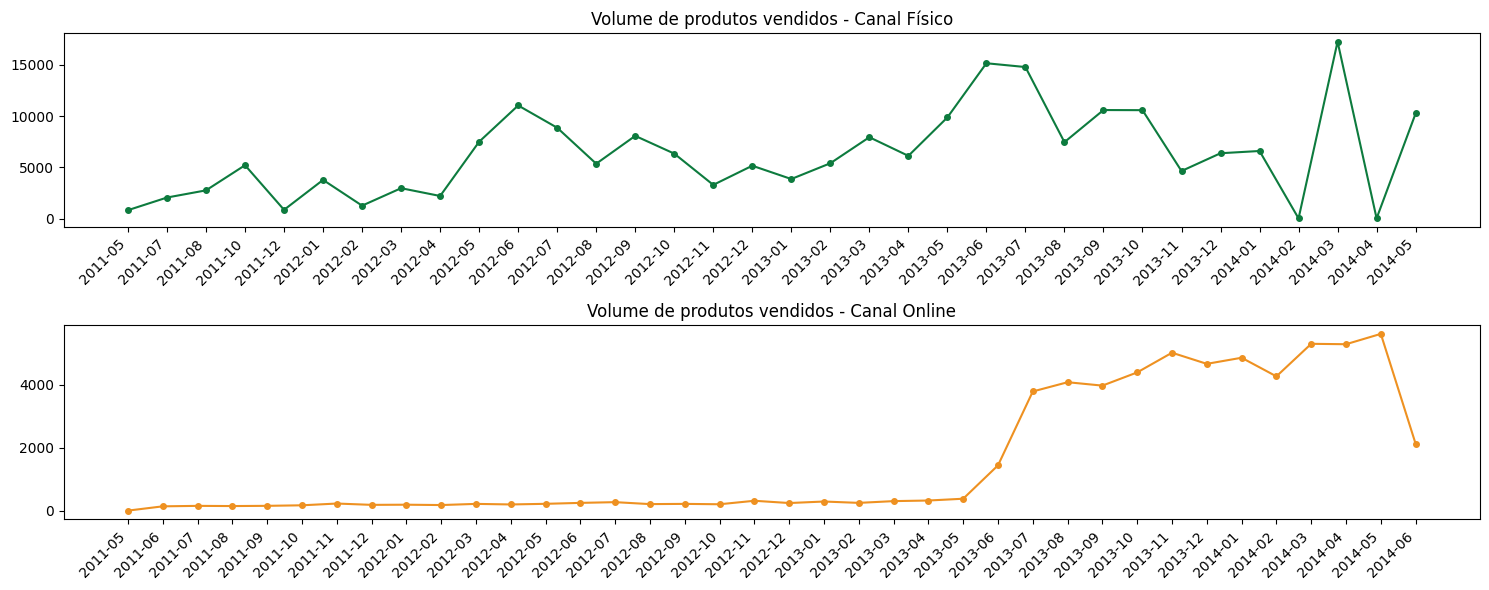

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Converta a coluna 'dt_pedido' para o formato de data
vendas_final['dt_pedido'] = pd.to_datetime(vendas_final['dt_pedido'], errors='coerce')

# Verifique o tipo de dados da coluna 'dt_pedido' após a conversão
print(vendas_final['dt_pedido'].dtype)

# Criação da coluna 'month_year' 
vendas_final['month_year'] = vendas_final['dt_pedido'].dt.to_period('M')

# Separando dados por canal
df_fisico = vendas_final[vendas_final['canal_venda'] == 'Físico'].copy()
df_online = vendas_final[vendas_final['canal_venda'] == 'Online'].copy()

# Agrupando por mês e ano para cada canal
fisico_grouped = df_fisico.groupby('month_year')['qt_encomendada_produto'].sum()
online_grouped = df_online.groupby('month_year')['qt_encomendada_produto'].sum()

# Plotando os gráficos
plt.figure(figsize=(15, 6))

# Subplot para o canal físico
plt.subplot(2, 1, 1)
plt.plot(fisico_grouped.index.astype(str), fisico_grouped.values, marker='o', markersize=4, color='#0d7b3e')
plt.title('Volume de produtos vendidos - Canal Físico')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

# Subplot para o canal online
plt.subplot(2, 1, 2)
plt.plot(online_grouped.index.astype(str), online_grouped.values, marker='o', markersize=4, color='#ee9121')
plt.title('Volume de produtos vendidos - Canal Online')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.show()


In [133]:
# Agrupando colunas por mês
vendas_final['dt_pedido'] = pd.to_datetime(vendas_final['dt_pedido'])
vendas_final['mes'] = vendas_final['dt_pedido'].dt.to_period('M')

In [134]:
quantidade_lojas = vendas_final['nome_loja'].nunique()
print(f"A quantidade de lojas distintas é: {quantidade_lojas}")


A quantidade de lojas distintas é: 634


In [146]:
# Dicionário de dados agregado

agg_dict = {
    'qt_encomendada_produto': 'sum',
    'canal_venda': 'first',
    'total_linha_produto': 'sum',
    'nm_produto': 'first',
    'nome_loja': 'first',
    'dt_pedido': 'first'   
}

df_agg = vendas_final.groupby(['id_produto', 'nome_loja', 'mes'], as_index=False).agg(agg_dict).reset_index()

In [147]:
print(f"Quantidade de lojas: {df_agg['nome_loja'].nunique()}")
print(f"Quantidade de produtos: {df_agg['id_produto'].nunique()}")
qt_pares_distintos = len(df_agg[['nome_loja', 'id_produto']].drop_duplicates())
print(f"Quantidade de pares distintos entre name_store e productis é: {qt_pares_distintos}")

Quantidade de lojas: 634
Quantidade de produtos: 266
Quantidade de pares distintos entre name_store e productis é: 20631


In [148]:
df_pares_agrupados = df_agg.groupby(['id_produto', 'nome_loja'])['mes'].nunique().reset_index()
df_pares_agrupados.columns = ['id_produto', 'nome_loja', 'contagem_mes_distinto']
print(df_pares_agrupados[df_pares_agrupados['contagem_mes_distinto']>5])

       id_produto                 nome_loja  contagem_mes_distinto
4             707  Advanced Bike Components                     11
8             707     Area Bike Accessories                      6
11            707          Better Bike Shop                      8
14            707  Bike Dealers Association                     12
19            707      Bikes and Motorbikes                      7
...           ...                       ...                    ...
20177         992             Não informado                     12
20231         993             Não informado                     12
20412         997             Não informado                     13
20488         998             Não informado                     12
20584         999             Não informado                     13

[1855 rows x 3 columns]


## Verificação de sazonalidade no produto Mountain-200 Black, 38

In [143]:
pip install statsforecast

Note: you may need to restart the kernel to use updated packages.


In [144]:
import statsforecast
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

/home/jeniffersanches/lh_desafio_final/adventure_works_lighthouse/academy-dbt/venv/lib/python3.11/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/home/jeniffersanches/lh_desafio_final/adventure_works_lighthouse/academy-dbt/venv/lib/python3.11/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [149]:
agg_dict['nome_loja'] = 'first'
agg_por_produto = df_agg.groupby(['id_produto', 'mes'], as_index=False).agg(agg_dict).reset_index()
agg_por_produto['id_produto'].value_counts()

id_produto
707    35
708    35
711    35
712    35
714    35
       ..
911     2
927     2
942     2
943     2
897     1
Name: count, Length: 266, dtype: Int64

In [150]:
# Criando um dataframe para o produtos com mais meses de venda
test = agg_por_produto[agg_por_produto['id_produto'] == 782][['mes', 'dt_pedido', 'qt_encomendada_produto', 'nm_produto']]
grouped_test = test.groupby('mes').agg({'qt_encomendada_produto': 'sum', 'dt_pedido': 'first', 'nm_produto': 'first'})
display(grouped_test)

,qt_encomendada_produto,dt_pedido,nm_produto
mes,,,
2012-05,84,2012-05-30,"Mountain-200 Black, 38"
2012-06,139,2012-06-30,"Mountain-200 Black, 38"
2012-07,136,2012-07-31,"Mountain-200 Black, 38"
2012-08,66,2012-08-30,"Mountain-200 Black, 38"
2012-09,150,2012-09-30,"Mountain-200 Black, 38"
2012-10,105,2012-10-30,"Mountain-200 Black, 38"
2012-11,76,2012-11-30,"Mountain-200 Black, 38"
2012-12,132,2012-12-31,"Mountain-200 Black, 38"
2013-01,93,2013-01-28,"Mountain-200 Black, 38"


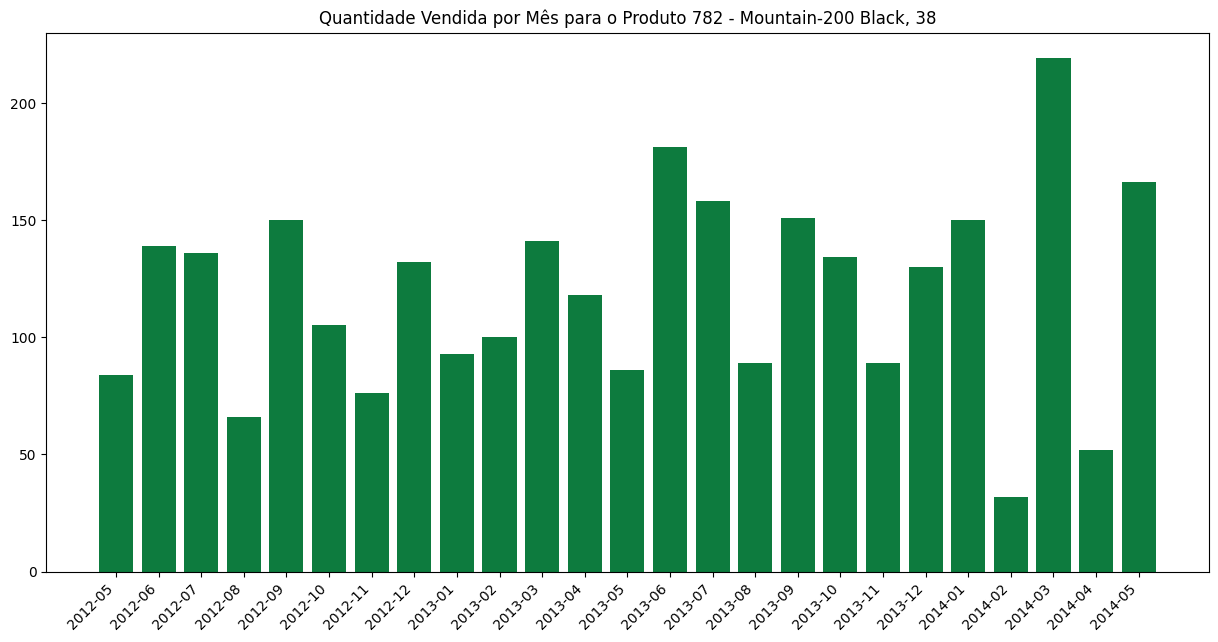

In [159]:
# Criar um gráfico de barras
plt.figure(figsize=(15, 7))
plt.bar(grouped_test.index.astype(str), grouped_test['qt_encomendada_produto'], color='#0d7b3e')

# Adicionar rótulos e título ao gráfico
plt.title('Quantidade Vendida por Mês para o Produto 782 - Mountain-200 Black, 38')
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

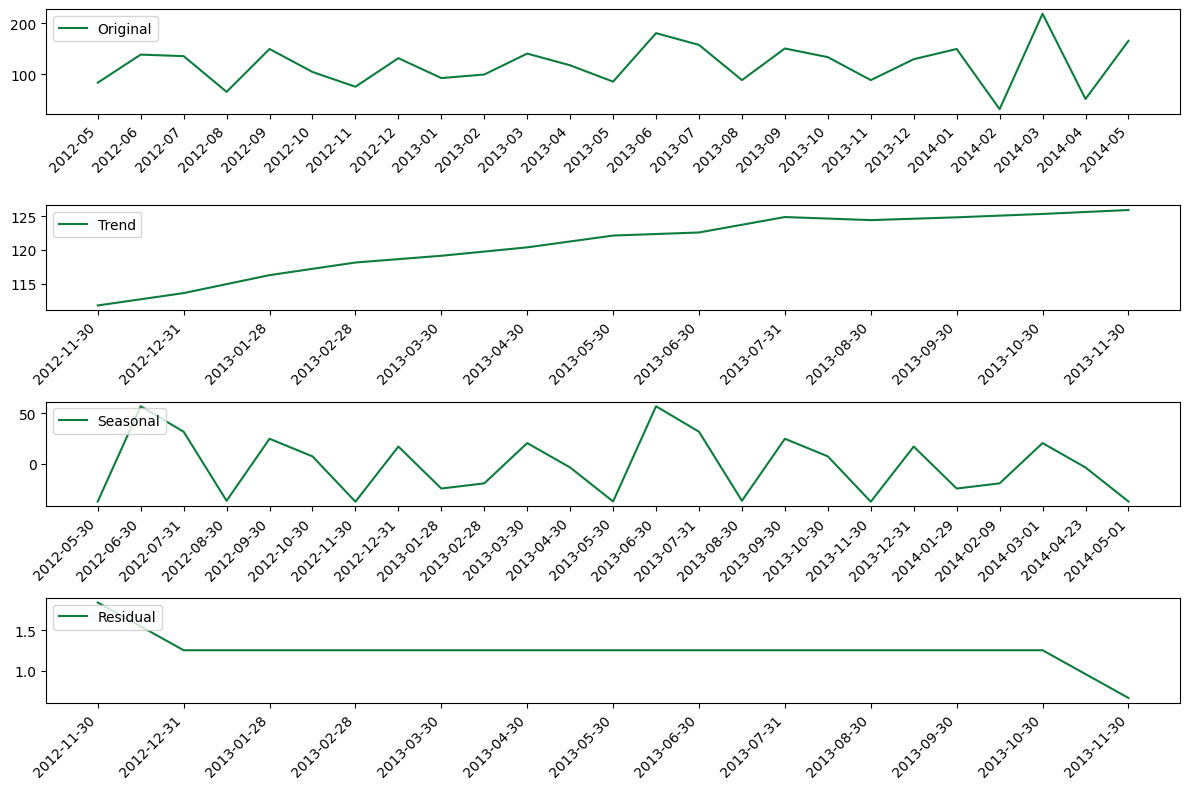

In [172]:
def seasonal_decomposition_plots(data: pd.DataFrame, seasonal_decomposition: DecomposeResult):
    
    # Plot the original time series, trend, seasonality, and residual
    plt.figure(figsize=(12, 8))
    
    # Subplot 1: Original
    plt.subplot(4, 1, 1)
    plt.plot(data.index.astype(str), data['qt_encomendada_produto'], label='Original', color='#0d7b3e')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

    # Subplot 2: Trend
    plt.subplot(4, 1, 2)
    plt.plot(seasonal_decomposition.trend.index.astype(str), seasonal_decomposition.trend, label='Trend', color='#0d7b3e')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

    # Subplot 3: Seasonal
    plt.subplot(4, 1, 3)
    plt.plot(seasonal_decomposition.seasonal.index.astype(str), seasonal_decomposition.seasonal, label='Seasonal', color='#0d7b3e')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

    # Subplot 4: Residual
    plt.subplot(4, 1, 4)
    plt.plot(seasonal_decomposition.resid.index.astype(str), seasonal_decomposition.resid, label='Residual', color='#0d7b3e')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    
    return plt.show()

# Substituindo 'test' pelo nome do Dataframe
resultado = seasonal_decompose(grouped_test.set_index('dt_pedido')['qt_encomendada_produto'], model='additive', period=12)
seasonal_decomposition_plots(data=grouped_test, seasonal_decomposition=resultado)

Podemos observar sazonalidade no produto 'Mountain-200 Black, 38' através do gráfico Seasonal. Temos um padão de repetição com picos para os meses 3, 6, 9 e 12.